# PHASE-2

### Team Members
#### Sahithi Bakaram-----------------sahithib(50442401)
#### Spoorthy Reddy Avancha----savancha(50442599)

### Machine Learning and Statistical Analysis

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import pandas.api.types as ptypes
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

Reading the data(csv) file

In [2]:
hotelbook_file=pd.read_csv('hotel_cleaned.csv')
hotelbook_dataframe=pd.DataFrame(hotelbook_file)
hotelbook_dataframe

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays,total_guests,kids,arrival_date
0,Resort Hotel,0,7,2015,July,27,1,0,1.0,1,...,Transient,75.00,0,0.0,Check-Out,2015-07-02,1.0,1,0,2015-07-01
1,Resort Hotel,0,13,2015,July,27,1,0,1.0,1,...,Transient,75.00,0,0.0,Check-Out,2015-07-02,1.0,1,0,2015-07-01
2,Resort Hotel,0,14,2015,July,27,1,0,2.0,2,...,Transient,98.00,0,1.0,Check-Out,2015-07-03,2.0,2,0,2015-07-01
3,Resort Hotel,0,0,2015,July,27,1,0,2.0,2,...,Transient,107.00,0,0.0,Check-Out,2015-07-03,2.0,2,0,2015-07-01
4,Resort Hotel,0,9,2015,July,27,1,0,2.0,2,...,Transient,103.00,0,1.0,Check-Out,2015-07-03,2.0,2,0,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86634,City Hotel,0,23,2017,August,35,30,2,5.0,2,...,Transient,96.14,0,0.0,Check-Out,2017-09-06,7.0,2,0,2017-08-30
86635,City Hotel,0,102,2017,August,35,31,2,5.0,3,...,Transient,225.43,0,2.0,Check-Out,2017-09-07,7.0,3,0,2017-08-31
86636,City Hotel,0,34,2017,August,35,31,2,5.0,2,...,Transient,157.71,0,2.5,Check-Out,2017-09-07,7.0,2,0,2017-08-31
86637,City Hotel,0,109,2017,August,35,31,2,5.0,2,...,Transient,104.40,0,0.0,Check-Out,2017-09-07,7.0,2,0,2017-08-31


In [3]:
hotelbook_dataframe=hotelbook_dataframe.drop(['reservation_status','country','reservation_status_date','arrival_date','reservation_status'], axis=1)

In [4]:
hotelbook_dataframe.columns[hotelbook_dataframe.dtypes!='object']

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_stays', 'total_guests', 'kids'],
      dtype='object')

In [5]:
numeric_columns=['lead_time', 'arrival_date_year','arrival_date_week_number', 'arrival_date_day_of_month','stays_in_weekend_nights', 'stays_in_week_nights', 'adults','is_repeated_guest', 'previous_cancellations','previous_bookings_not_canceled', 'booking_changes','days_in_waiting_list', 'adr', 'required_car_parking_spaces','total_of_special_requests', 'total_stays','total_guests', 'kids']
categorical_columns=['hotel', 'meal', 'market_segment','distribution_channel', 'reserved_room_type', 'assigned_room_type','deposit_type', 'customer_type']

In [6]:
#response variables
X = hotelbook_dataframe.drop(['is_canceled'], axis=1)

In [7]:
#converting to categorical features
X['hotel'].replace(['Resort Hotel','City Hotel'],[0,1],inplace=True)
X['meal'].replace(['BB' , 'FB', 'HB', 'SC', 'Undefined'],[0,1,2,3,4],inplace=True)
X['market_segment'].replace(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO','Complementary', 'Groups', 'Undefined', 'Aviation'],[0,1,2,3,4,5,6,7],inplace=True)
X['distribution_channel'].replace(['Direct', 'Corporate', 'TA/TO', 'Undefined','GDS'],[0,1,2,3,4],inplace=True)
X['reserved_room_type'].replace(['A','B','C','D','E','F','G','H','L'],[0,1,2,3,4,5,6,7,8],inplace=True)
X['assigned_room_type'].replace(['A','B','C','D','E','F','G','H','L','I','K'],[0,1,2,3,4,5,6,7,8,9,10],inplace=True)
X['deposit_type'].replace(['No Deposit','Refundable', 'Non Refund'],[0,1,2],inplace=True)
X['customer_type'].replace(['Transient','Contract','Transient-Party','Group'],[0,1,2,3],inplace=True)
month_map = {'January':'01', 'February':'02', 'March':'03', 'April':'04', 'May':'05', 'June':'06', 'July':'07', 'August':'08', 'September':'09', 'October':'10', 'November':'11', 'December':'12'}
X.arrival_date_month = X.arrival_date_month.map(month_map).astype(int)

In [8]:
# normalize numeric features.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])
X.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stays,total_guests,kids
0,0,-0.884649,-1.767165,7,0.013021,-1.677001,-1.012756,-0.886741,-1.414998,0,...,-0.377745,0,-0.074805,0,-0.645238,-0.300067,-0.875520,-1.136207,-1.303484,-0.317612
1,0,-0.810713,-1.767165,7,0.013021,-1.677001,-1.012756,-0.886741,-1.414998,0,...,-0.377745,0,-0.074805,0,-0.645238,-0.300067,-0.875520,-1.136207,-1.303484,-0.317612
2,0,-0.798390,-1.767165,7,0.013021,-1.677001,-1.012756,-0.330669,0.192034,0,...,-0.377745,0,-0.074805,0,-0.170124,-0.300067,0.411464,-0.687782,-0.038785,-0.317612
3,0,-0.970907,-1.767165,7,0.013021,-1.677001,-1.012756,-0.330669,0.192034,0,...,-0.377745,0,-0.074805,0,0.015790,-0.300067,-0.875520,-0.687782,-0.038785,-0.317612
4,0,-0.860003,-1.767165,7,0.013021,-1.677001,-1.012756,-0.330669,0.192034,1,...,-0.377745,0,-0.074805,0,-0.066839,-0.300067,0.411464,-0.687782,-0.038785,-0.317612


In [9]:
#predictor variable
Y=hotelbook_dataframe['is_canceled']

In [10]:
# separating training data and testing data.
from sklearn.model_selection import train_test_split
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2)
print("size of training data is", XTrain.shape)
print("size of testing data is", XTest.shape)

size of training data is (69311, 27)
size of testing data is (17328, 27)


In [11]:
#function to define all evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score,roc_curve,auc
def Evaluation(YTest, YPred, YPred_Prob, method=''):
    print('====================== ' + method + ' ======================')
    acc = accuracy_score(YTest, YPred) * 100
    print('Accuracy is %.3f%%' % acc)
    print('\n')
    cm = confusion_matrix(YTest, YPred)
    print('Confusion Matrix')
    print(pd.DataFrame(cm, columns=['Pred Negative','Pred Positive'], index=['Actual Negative', 'Actual Positive']))
    precision = cm[1][1] / (cm[0][1] + cm[1][1]) if (cm[0][1] + cm[1][1]) else 0
    recall = cm[1][1] / (cm[1][0] + cm[1][1]) if (cm[1][0] + cm[1][1]) else 0
    F1 = 2 * precision * recall / (precision + recall) if (precision + recall) else 0
    print('Precision is %.3f' % precision)
    print('Recall is %.3f' % recall)
    print('F1 score is %.3f' % F1)
    group_names = ['True Negative','False Positive','False Negative','True Positive']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    labels = labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels,fmt='')

In [12]:
def ROC_AUC_Curve(YTest, YPred, YPred_Prob, method=''):
    fpr,tpr,thresholds = roc_curve(YTest,YPred_Prob)
    print('AUC is:',auc(fpr, tpr))
    plt.plot(fpr,tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [13]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(XTrain, YTrain)
YPred = model.predict(XTest)

Train Accuracy is 0.3970654008743201
Test Accuracy is 0.3965258541089566
====================== Naive Bayes ======================
Accuracy is 39.653%


Confusion Matrix
                 Pred Negative  Pred Positive
Actual Negative           2104          10375
Actual Positive             82           4767
Precision is 0.315
Recall is 0.983
F1 score is 0.477


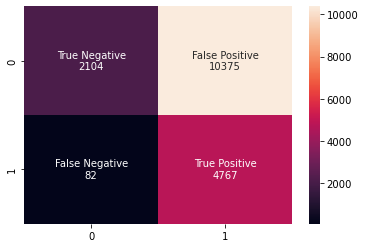

In [14]:
print('Train Accuracy is',model.score(XTrain, YTrain))
print('Test Accuracy is',model.score(XTest, YTest))
acc_nb = accuracy_score(YTest, YPred)
YPred_Prob = model.predict_proba(XTest)
YPred_Prob = YPred_Prob[:,1]
Evaluation(YTest, YPred, YPred_Prob, 'Naive Bayes')

AUC is: 0.73636606178107


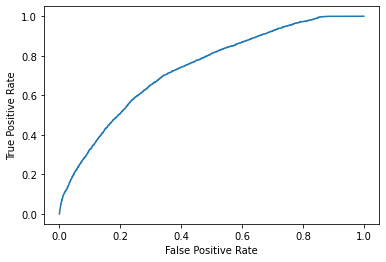

In [15]:
ROC_AUC_Curve(YTest, YPred, YPred_Prob, 'Naive Bayes')

In [16]:
#K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 8,n_jobs = -1)
model.fit(XTrain, YTrain)
YPred = model.predict(XTest)

Train Accuracy is 0.8250926981287242
Test Accuracy is 0.7813942751615882
====================== K-Nearest Neighbor ======================
Accuracy is 78.139%


Confusion Matrix
                 Pred Negative  Pred Positive
Actual Negative          11475           1004
Actual Positive           2784           2065
Precision is 0.673
Recall is 0.426
F1 score is 0.522


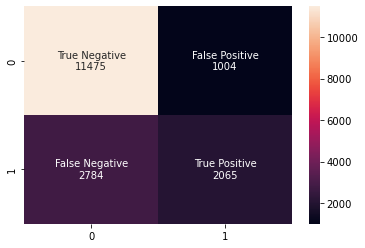

In [17]:
print('Train Accuracy is',model.score(XTrain, YTrain))
print('Test Accuracy is',model.score(XTest, YTest))
acc_knn = accuracy_score(YTest, YPred)
YPred_Prob = model.predict_proba(XTest)
YPred_Prob = YPred_Prob[:,1]
Evaluation(YTest, YPred, YPred_Prob, 'K-Nearest Neighbor')

Text(0.5, 0, 'K Value')

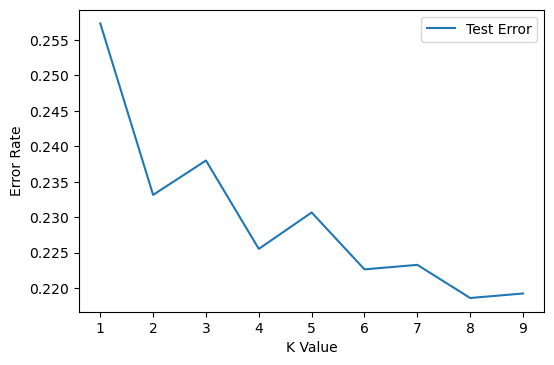

In [18]:
test_error_rates = []


for k in range(1,10):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(XTrain,YTrain) 
   
    y_pred = knn_model.predict(XTest)
    
    test_error = 1 - accuracy_score(YTest,y_pred)
    test_error_rates.append(test_error)

plt.figure(figsize=(6,4),dpi=100)
plt.plot(range(1,10),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

AUC is: 0.7983869489730167


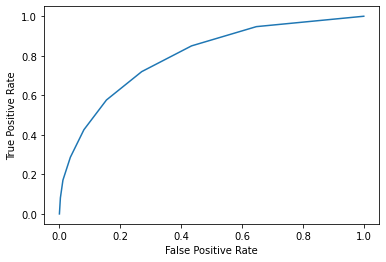

In [19]:
ROC_AUC_Curve(YTest, YPred, YPred_Prob, 'K-Nearest Neighbor')

In [20]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(XTrain, YTrain)
YPred = model.predict(XTest)

Train Accuracy is 0.7748120788907965
Test Accuracy is 0.7725646352723915
====================== Logistic Regression ======================
Accuracy is 77.256%


Confusion Matrix
                 Pred Negative  Pred Positive
Actual Negative          11773            706
Actual Positive           3235           1614
Precision is 0.696
Recall is 0.333
F1 score is 0.450


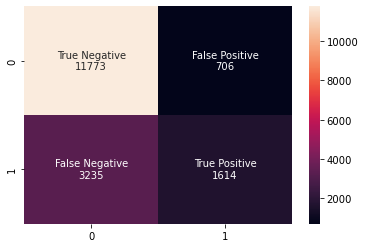

In [21]:
print('Train Accuracy is',model.score(XTrain, YTrain))
print('Test Accuracy is',model.score(XTest, YTest))
acc_lr = accuracy_score(YTest, YPred)
YPred_Prob = model.predict_proba(XTest)
YPred_Prob = YPred_Prob[:,1]
Evaluation(YTest, YPred, YPred_Prob, 'Logistic Regression')

AUC is: 0.7941419869563171


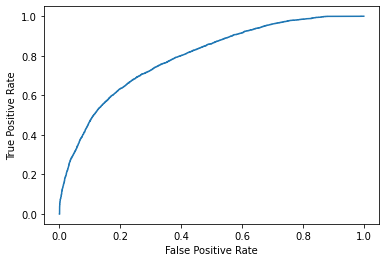

In [22]:
ROC_AUC_Curve(YTest, YPred, YPred_Prob, 'Logistic Regression')

In [23]:
# Decision Tree.
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="gini", splitter="best", max_features=None, min_samples_split=300, min_samples_leaf=1, random_state=0)
model.fit(XTrain, YTrain)
YPred = model.predict(XTest)

Train Accuracy is 0.8125982888718962
Test Accuracy is 0.7958795013850416
====================== Decision Tree ======================
Accuracy is 79.588%


Confusion Matrix
                 Pred Negative  Pred Positive
Actual Negative          11282           1197
Actual Positive           2340           2509
Precision is 0.677
Recall is 0.517
F1 score is 0.587


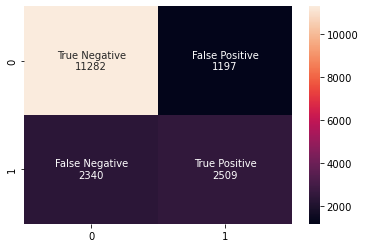

In [24]:
print('Train Accuracy is',model.score(XTrain, YTrain))
print('Test Accuracy is',model.score(XTest, YTest))
acc_dtc = accuracy_score(YTest, YPred)
YPred_Prob = model.predict_proba(XTest)
YPred_Prob = YPred_Prob[:,1]
Evaluation(YTest, YPred, YPred_Prob, 'Decision Tree')

AUC is: 0.8290198351956798


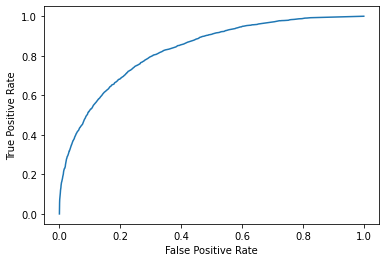

In [25]:
ROC_AUC_Curve(YTest, YPred, YPred_Prob, 'Decision Tree')

In [26]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=18,criterion='gini', max_features = 'sqrt', n_jobs=-1, verbose=1, random_state=0)
model.fit(XTrain, YTrain)
YPred = model.predict(XTest)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Train Accuracy is 0.8713479822827546
Test Accuracy is 0.813134810710988
====================== Random Forest ======================
Accuracy is 81.313%


Confusion Matrix
                 Pred Negative  Pred Positive
Actual Negative          11634            845
Actual Positive           2393           2456
Precision is 0.744
Recall is 0.506
F1 score is 0.603


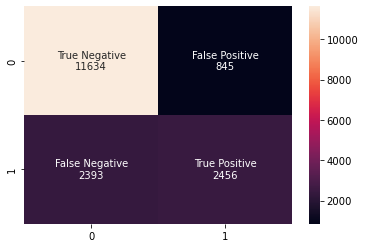

In [27]:
print('Train Accuracy is',model.score(XTrain, YTrain))
print('Test Accuracy is',model.score(XTest, YTest))
acc_rfc = accuracy_score(YTest, YPred)
YPred_Prob = model.predict_proba(XTest)
YPred_Prob = YPred_Prob[:,1]
Evaluation(YTest, YPred, YPred_Prob, 'Random Forest')

AUC is: 0.8575283936282908


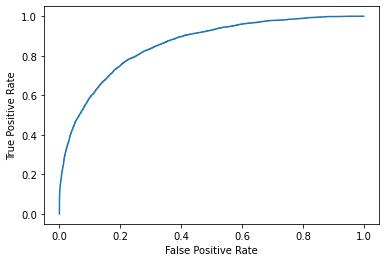

In [28]:
ROC_AUC_Curve(YTest, YPred, YPred_Prob, 'Random Forest')

Text(0.5, 0, 'Feature Importance')

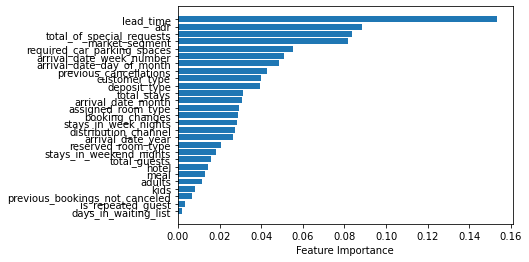

In [29]:
sorted_index = model.feature_importances_.argsort()
plt.barh(X.columns[sorted_index], model.feature_importances_[sorted_index])
plt.xlabel("Feature Importance")

In [30]:
models = pd.DataFrame({
    'Model' : ['Naive Bayes','K-Nearest Neighbor','Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score' : [acc_nb,acc_knn,acc_lr, acc_dtc, acc_rfc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Random Forest Classifier,0.813135
3,Decision Tree Classifier,0.795880
1,K-Nearest Neighbor,0.781394
2,Logistic Regression,0.772565
0,Naive Bayes,0.396526


In [32]:
px.bar(data_frame = models, x = 'Model', y ='Score' , color = 'Score', title = 'Models Comparison')